<div,align=right>Lukas Blecher, Christopher Lueken-Winkels</div>
# Exercise 5


In [57]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as sLA
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Constructing the matrix X

In [107]:
def construct_X(M, alphas, Np = None):
    '''
    M: resulting tomogram size D in one dimension (D=MxM) 
    alphas: list of No angles in degrees
    Np: sensor resolution (optional)
    returns X of shape (Np*No)xD
    '''
    #convert to numpy array and into radian
    alphas=np.array(alphas)*np.pi/180
    #in case Np is not given we will select one large enough to fit the diagonal of the image beta
    if Np==None:
        Np=np.ceil(np.sqrt(2)*M)
        if Np%2==0: #Np is even
            Np+=1
    
    N=len(alphas)*Np #response vector size
    D=M*M
    #create coordinate matrix C of the ceter of each pixel measured from the center of the image
    
    #"x" distance
    C_0 = np.mod(np.arange(D),M) - (M - 1)/2
    #"y" distance
    C_1 = np.floor_divide(np.arange(D),M) - (M - 1)/2
    #merge for C
    C = np.array([C_0,C_1]).T
    
    translation = np.matmul(C,np.array([np.cos(alphas),np.sin(-alphas)])).T
    #this is now projected on the senor using the position of the center as reference
    sensorpos = (Np - 1)/ 2 + translation
    #first the indices of the smaller pixels then the ones of the larger ones
    i_p = np.array([np.floor(sensorpos), np.ceil(sensorpos)]).flatten()
    #[0]*D,[1]*D,...,[No-1]*D twice repeated
    i_o = np.tile(np.outer(np.arange(len(alphas)),np.ones(D)).flatten(),2)
    #combine them to our i_indices
    i_indices =  i_p + Np * i_o
    
    #simply [0,1,...,No-1]*2D
    j_indices = np.tile(np.tile(np.arange(D),len(alphas)),2)
    
    #compute the weights
    weight_ceil = np.mod(sensorpos, 1).flatten()
    weight_floor = 1 - weight_ceil
    #and combine them in the correct order
    weights = np.append(weight_floor,weight_ceil)
    #now we return the matrix X:
    return sp.coo_matrix((weights, (i_indices, j_indices)),shape = (N,D), dtype = np.float32)
    
    
    

Given were two different sized datasets. The smaller one has the following properties: Image size 77 x 77, sensor size 109 and 90 projection angles.


Display the image $X$ 

(-0.5, 99.5, 44.5, -0.5)

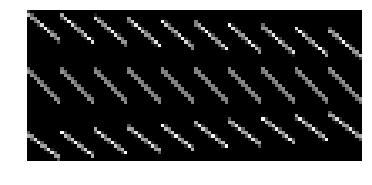

In [108]:
#given the example data
plt.gray()
plt.imshow(np.load('hs_tomography/X_example.npy'))
plt.axis('off')

(-0.5, 99.5, 44.5, -0.5)

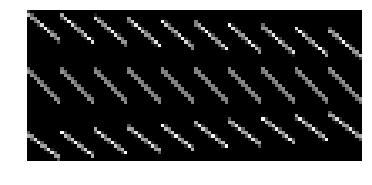

In [109]:
#self computed
plt.gray()
plt.imshow(construct_X(10,[-33,1,42],15).toarray())
plt.axis('off')

## Recovering the image

In [110]:
def compute_mu(X,y):
    '''
    X: weight matrix of shape (N,D)
    y: sensor data
    returns the image 
    '''
    #use scipy.sparse.linalg.lsqr to calculate beta, also convert X to Compressed Sparse Column format 
    beta=sLA.lsqr(sp.csc_matrix(X),y,atol=1e-5,btol=1e-5)[0]
    #get M from D
    M=int(np.sqrt(len(beta)))
    #return the image mu by reshaping beta
    return beta.reshape(M,M)

In [117]:
X=np.load('hs_tomography/X_77.npy')[()]
y=np.load('hs_tomography/y_195.npy')
#mu=compute_mu(X,y)

(-0.5, 76.5, 76.5, -0.5)

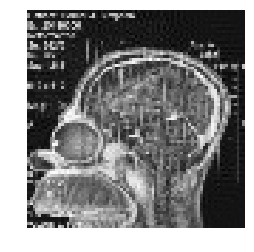

In [112]:
#self computed
plt.gray()
plt.imshow(mu)
plt.axis('off')

In [118]:
alphas = np.load('hs_tomography/alphas_195.npy')
X2 = construct_X(195,alphas,275)
mu2=compute_mu(X2,y)


(49225, 38025)


(-0.5, 194.5, 194.5, -0.5)

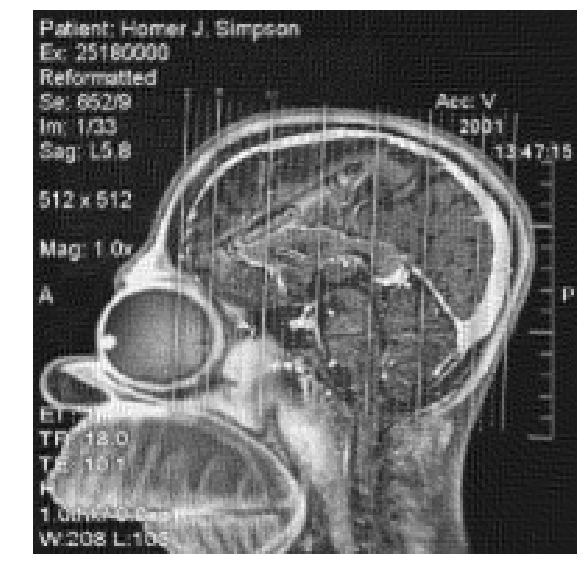

In [122]:
#self computed
plt.figure(figsize = (20,10))
plt.gray()
plt.imshow(mu2)
plt.axis('off')

### Diagnosis
There is crayon in the head of the patient

### Treatment
Remove the crayon

array([-90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78,
       -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65,
       -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52,
       -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26,
       -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88], dtype=